## Eksploracja danych – analiza wstępna

## Ten projekt dotyczy analizy danych medycznych pacjentów z niewydolnością serca i próby przewidzenia ryzyka zgonu za pomocą różnych algorytmów uczenia maszynowego.

In [1]:
!pip install mlxtend


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tensorflow



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import random
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from mlxtend.plotting import plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import tree
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn import datasets
from tensorflow import keras
from numpy import mean, cov
from numpy.linalg import eig
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

In [4]:
import pandas as pd

# Wczytanie danych z pulpitu 
heartData = pd.read_csv(r'C:\Users\dell\Desktop\heart_failure_clinical_records_dataset.csv')


print("Kolumny w pliku CSV:")
print(heartData.columns)


age = heartData['age']
anaemia = heartData['anaemia']
cpk = heartData['creatinine_phosphokinase']
diabetes = heartData['diabetes']
ef = heartData['ejection_fraction']
hbp = heartData['high_blood_pressure']
platelets = heartData['platelets']
cr = heartData['serum_creatinine']
sod = heartData['serum_sodium']
gender = heartData['sex']
smoke = heartData['smoking']
time = heartData['time']
death = heartData['DEATH_EVENT']  


col_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
             'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
             'sex', 'smoking', 'time']

Kolumny w pliku CSV:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Podział danych: cechy (X) i etykieta (y)
X = heartData.drop('DEATH_EVENT', axis=1)
y = heartData['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, shuffle=True
)

# Standaryzacja danych (średnia = 0, odchylenie = 1)
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Zbiór danych

Zbiór danych zawiera 1 zmienną docelową i 12 cech wejściowych obejmujących informacje kliniczne, fizyczne i dotyczące stylu życia:

Age – Wiek pacjenta

Anaemia – Niedokrwistość (spadek liczby czerwonych krwinek lub poziomu hemoglobiny)

High Blood Pressure – Czy pacjent ma nadciśnienie

Creatinine phosphokinase (CPK) – Poziom enzymu CPK we krwi

Diabetes – Czy pacjent choruje na cukrzycę

Ejection fraction – Procentowa ilość krwi wypompowywanej z serca przy każdym skurczu

Sex – Płeć pacjenta (kobieta lub mężczyzna)

Platelets – Liczba płytek krwi

Serum creatinine – Poziom kreatyniny we krwi

Serum sodium – Poziom sodu we krwi

Smoking – Czy pacjent pali papierosy

Time – Czas obserwacji po wystąpieniu niewydolności serca

Death event (zmienna docelowa) – Czy pacjent zmarł w trakcie okresu obserwacji

In [6]:
heartData.describe()  

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Sprawdzenie brakujących danych**

In [7]:

print("Liczba brakujących wartości w każdej kolumnie:")
print(heartData.isnull().sum())


Liczba brakujących wartości w każdej kolumnie:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [8]:
heartData.shape

(299, 13)

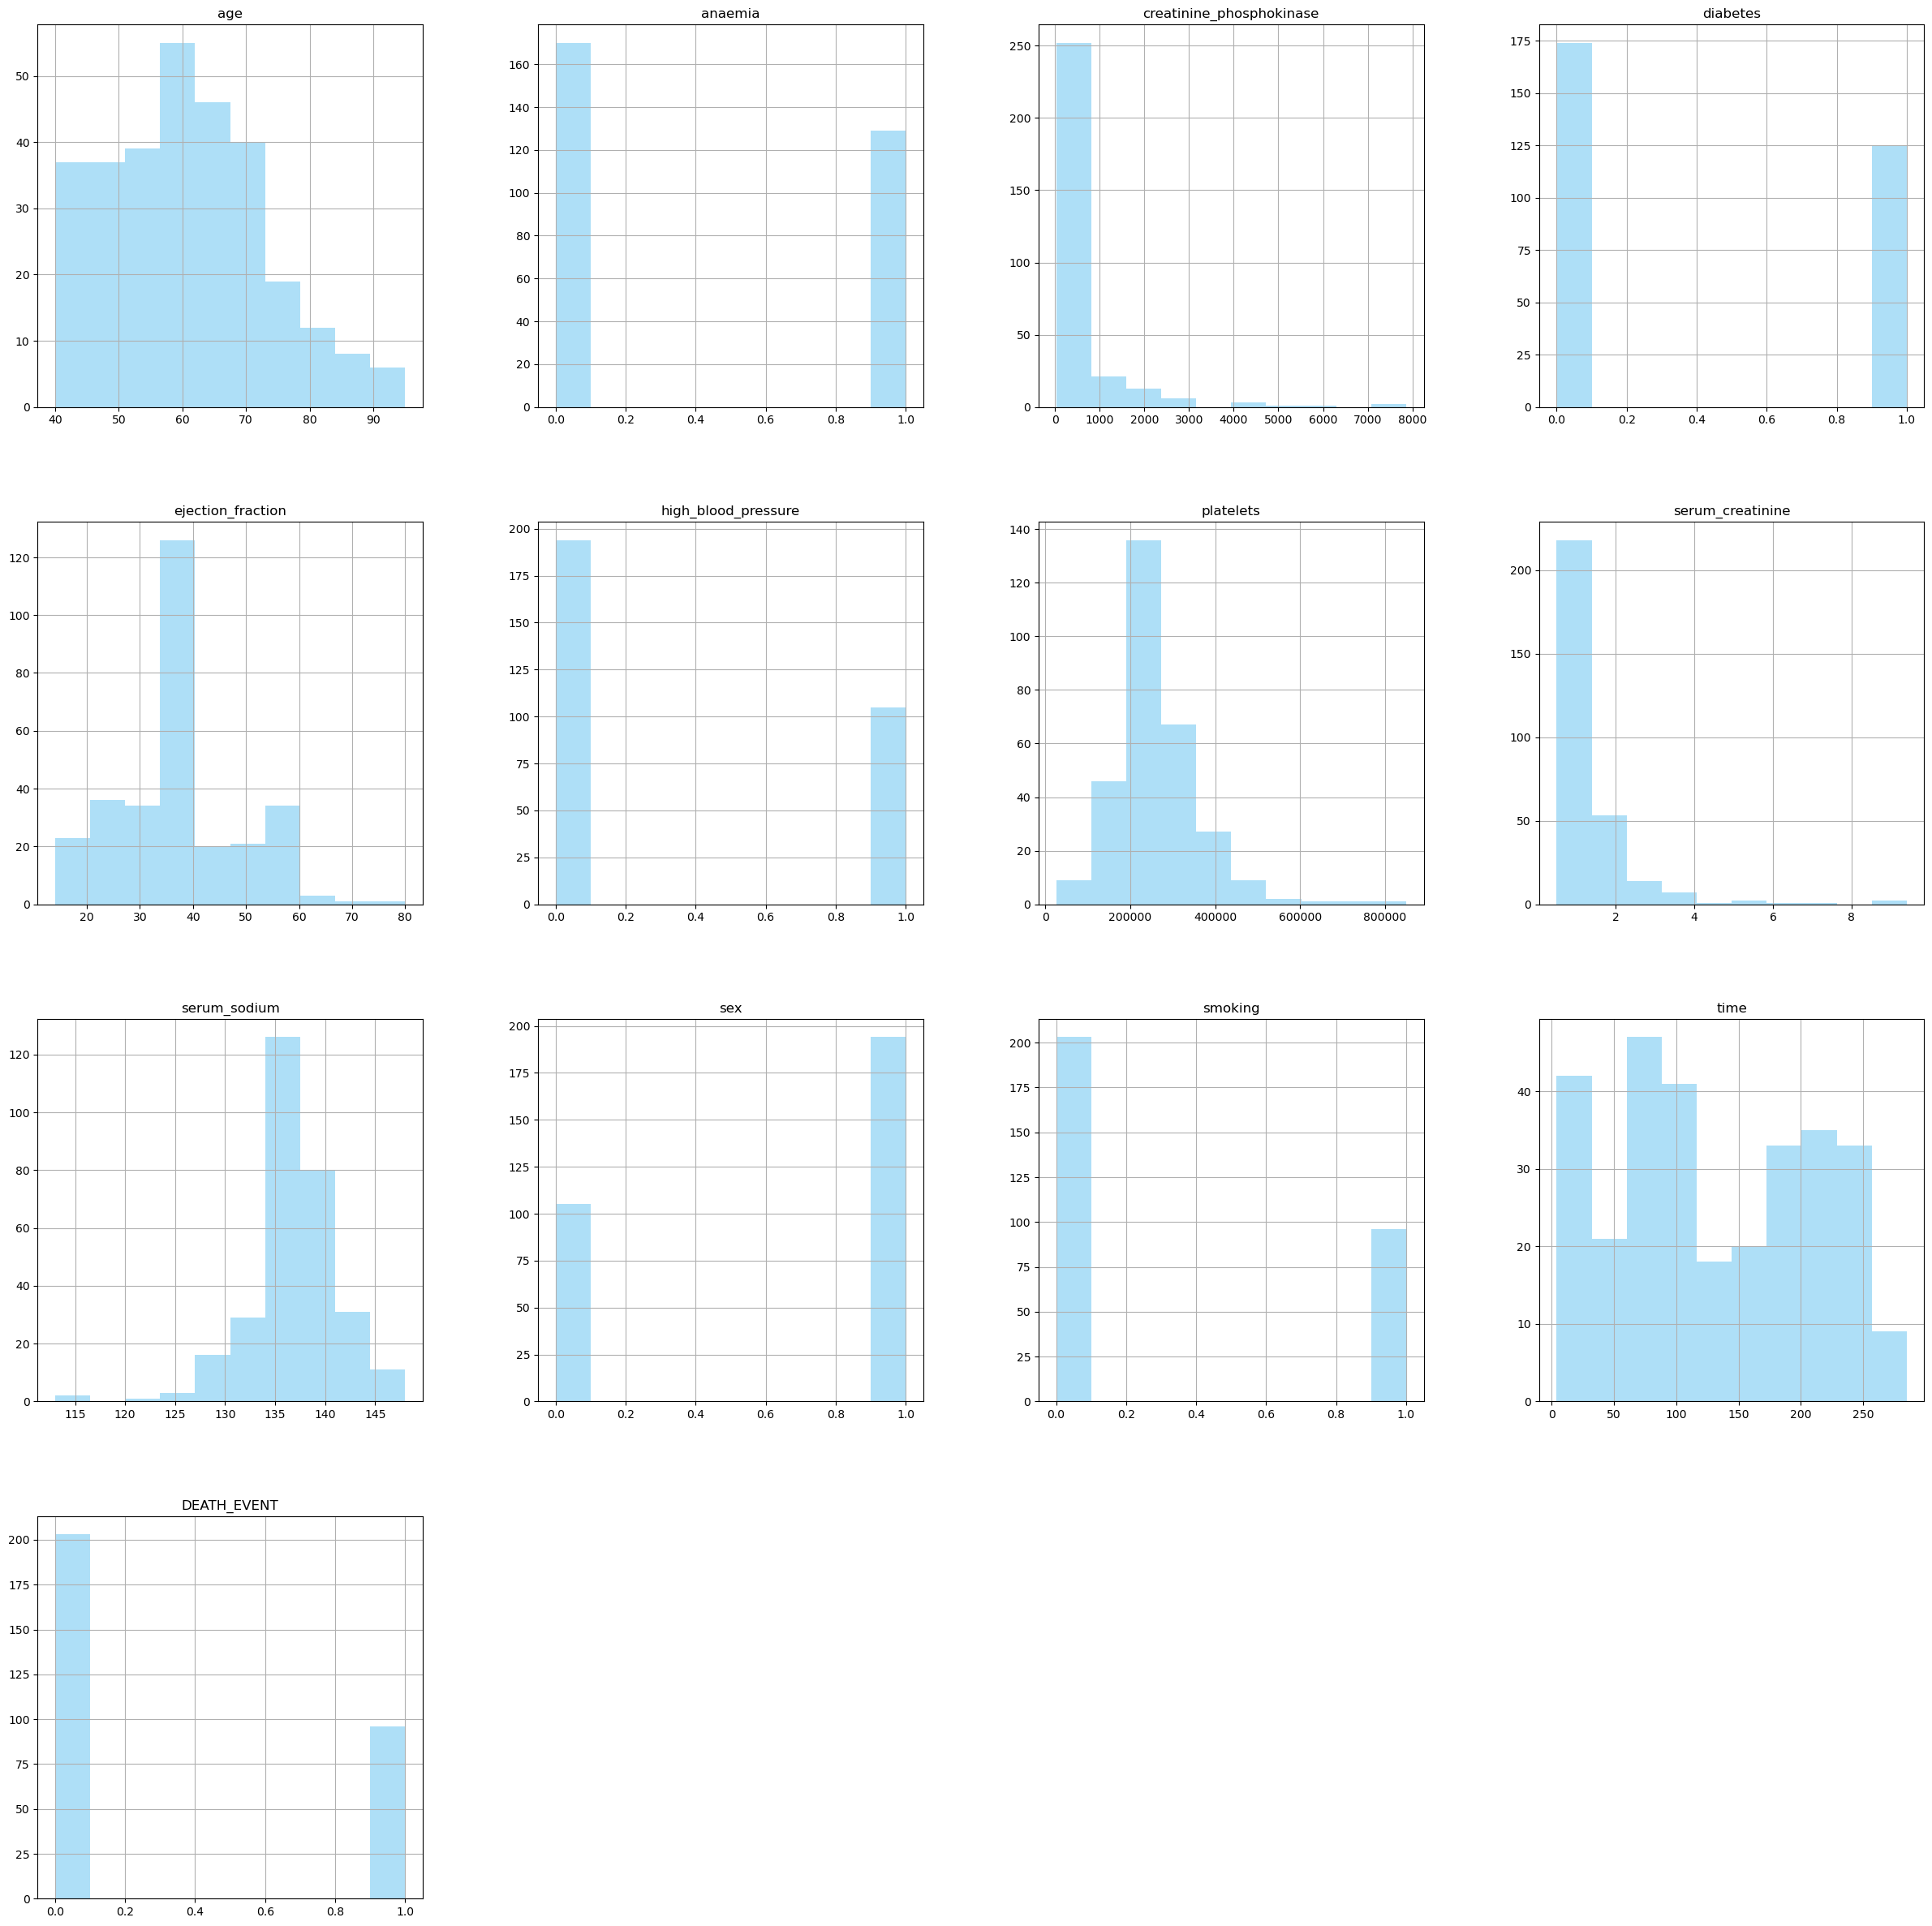

In [9]:
heartData.hist(bins=10,figsize=(30,30),color = '#AEDFF7')
plt.show()

## **Ilu pacjentów przeżyło po przebytej niewydolności serca?**

In [10]:
print(heartData.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


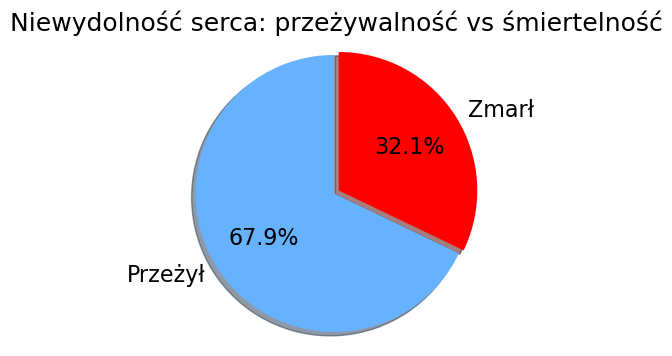

In [11]:
import matplotlib.pyplot as plt

labels = ['Przeżył', 'Zmarł']
sizes = [
    len(heartData[heartData['DEATH_EVENT'] == 0]),
    len(heartData[heartData['DEATH_EVENT'] == 1])
]
explode = (0, 0.04) 

fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    colors=('#66B2FF', '#FF0000'), 
    startangle=90,
    textprops={'fontsize': 16}
)

ax1.set_title(
    "Niewydolność serca: przeżywalność vs śmiertelność",
    fontdict={'fontsize': 18}
)
ax1.axis('equal') 

plt.show()


Wyniki: Nieco ponad 2/3 pacjentów przeżyło po wystąpieniu niewydolności serca.

## Czy płeć wpływa na przeżywalność pacjentów?

In [12]:
d1 = heartData[(heartData["DEATH_EVENT"] == 0) & (heartData["sex"] == 1)]  # mężczyźni, którzy przeżyli
d2 = heartData[(heartData["DEATH_EVENT"] == 1) & (heartData["sex"] == 1)]  # mężczyźni, którzy zmarli
d3 = heartData[(heartData["DEATH_EVENT"] == 0) & (heartData["sex"] == 0)]  # kobiety, które przeżyły
d4 = heartData[(heartData["DEATH_EVENT"] == 1) & (heartData["sex"] == 0)]  # kobiety, które zmarły


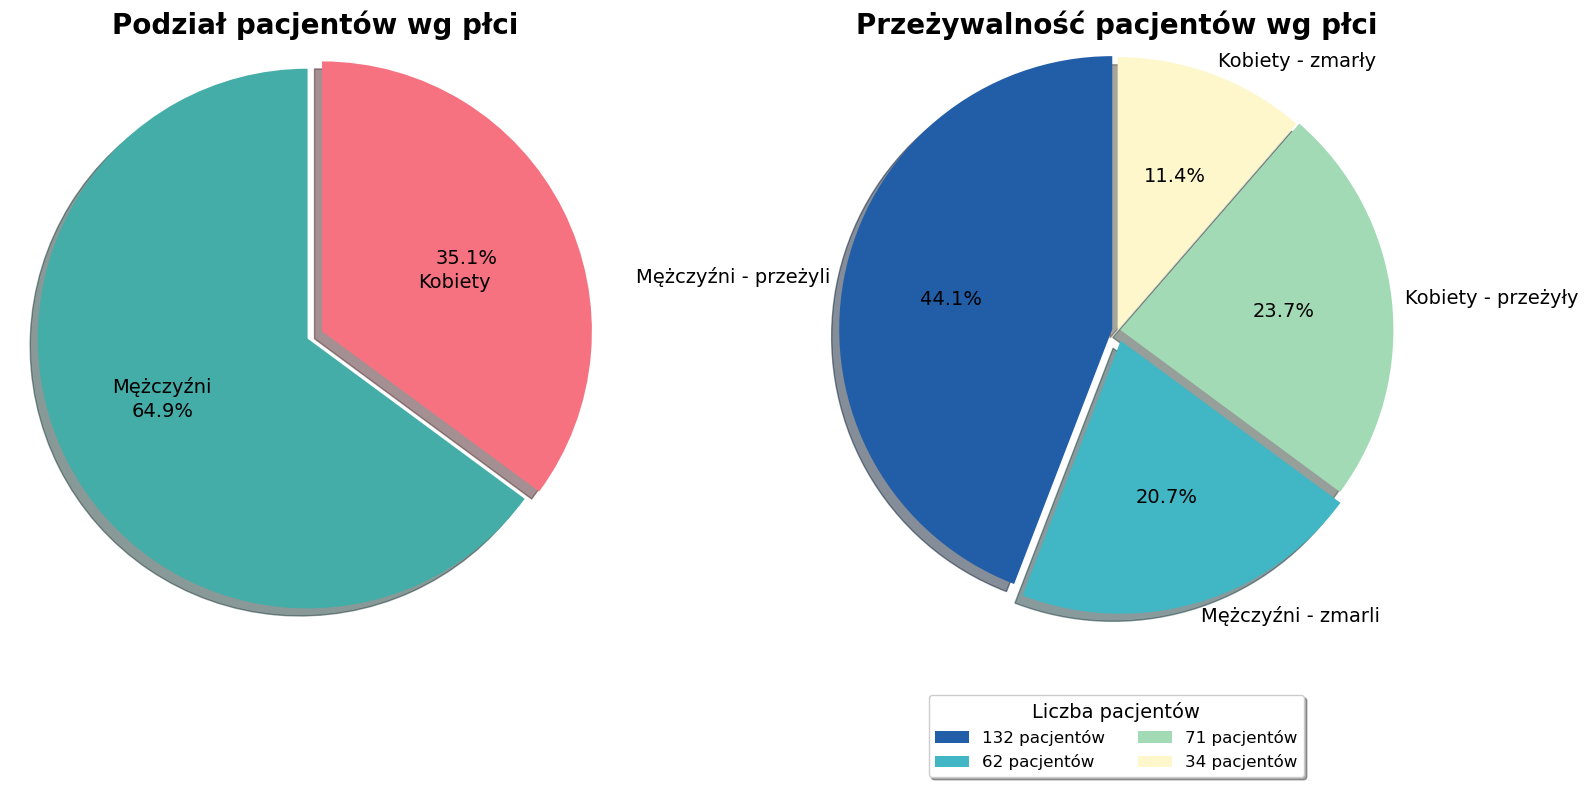

In [13]:
labels = ['Mężczyźni', 'Kobiety']
size1 = [len(d1) + len(d2), len(d3) + len(d4)]
explode = (0.02, 0.04)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Wykres 1: rozkład płci
ax1.pie(size1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors=['#45ADA8', '#F67280'], labeldistance=0.4,
        startangle=90, textprops={'fontsize': 14})
ax1.set_title("Podział pacjentów wg płci", fontdict={'fontsize': 20, 'weight': 'bold'})
ax1.axis('equal')

# Wykres 2: przeżywalność wg płci
labels2 = ['Mężczyźni - przeżyli', 'Mężczyźni - zmarli', 
           'Kobiety - przeżyły', 'Kobiety - zmarły']
size2 = [len(d1), len(d2), len(d3), len(d4)]
explode2 = (0.02, 0.04, 0.01, 0)

ax2.pie(size2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, colors=['#225ea8', '#41b6c4', '#a1dab4', '#fff7cc'],
        labeldistance=1.05, startangle=90, textprops={'fontsize': 14})
ax2.set_title("Przeżywalność pacjentów wg płci", fontdict={'fontsize': 20, 'weight': 'bold'})
ax2.axis('equal')

# Legenda poniżej drugiego wykresu
ax2.legend([f'{x} pacjentów' for x in size2],
           title="Liczba pacjentów", loc='upper center',
           bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2,
           fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()

## Jaki jest ogólny przedział wiekowy pacjentów?

C:\Users\dell\AppData\Local\Temp\ipykernel_21388\213553082.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  dia.set_xticklabels([int(float(label.get_text())) for label in dia.get_xticklabels()], rotation=45, fontsize=14)


Minimalny wiek pacjenta: 40.0
Maksymalny wiek pacjenta: 95.0


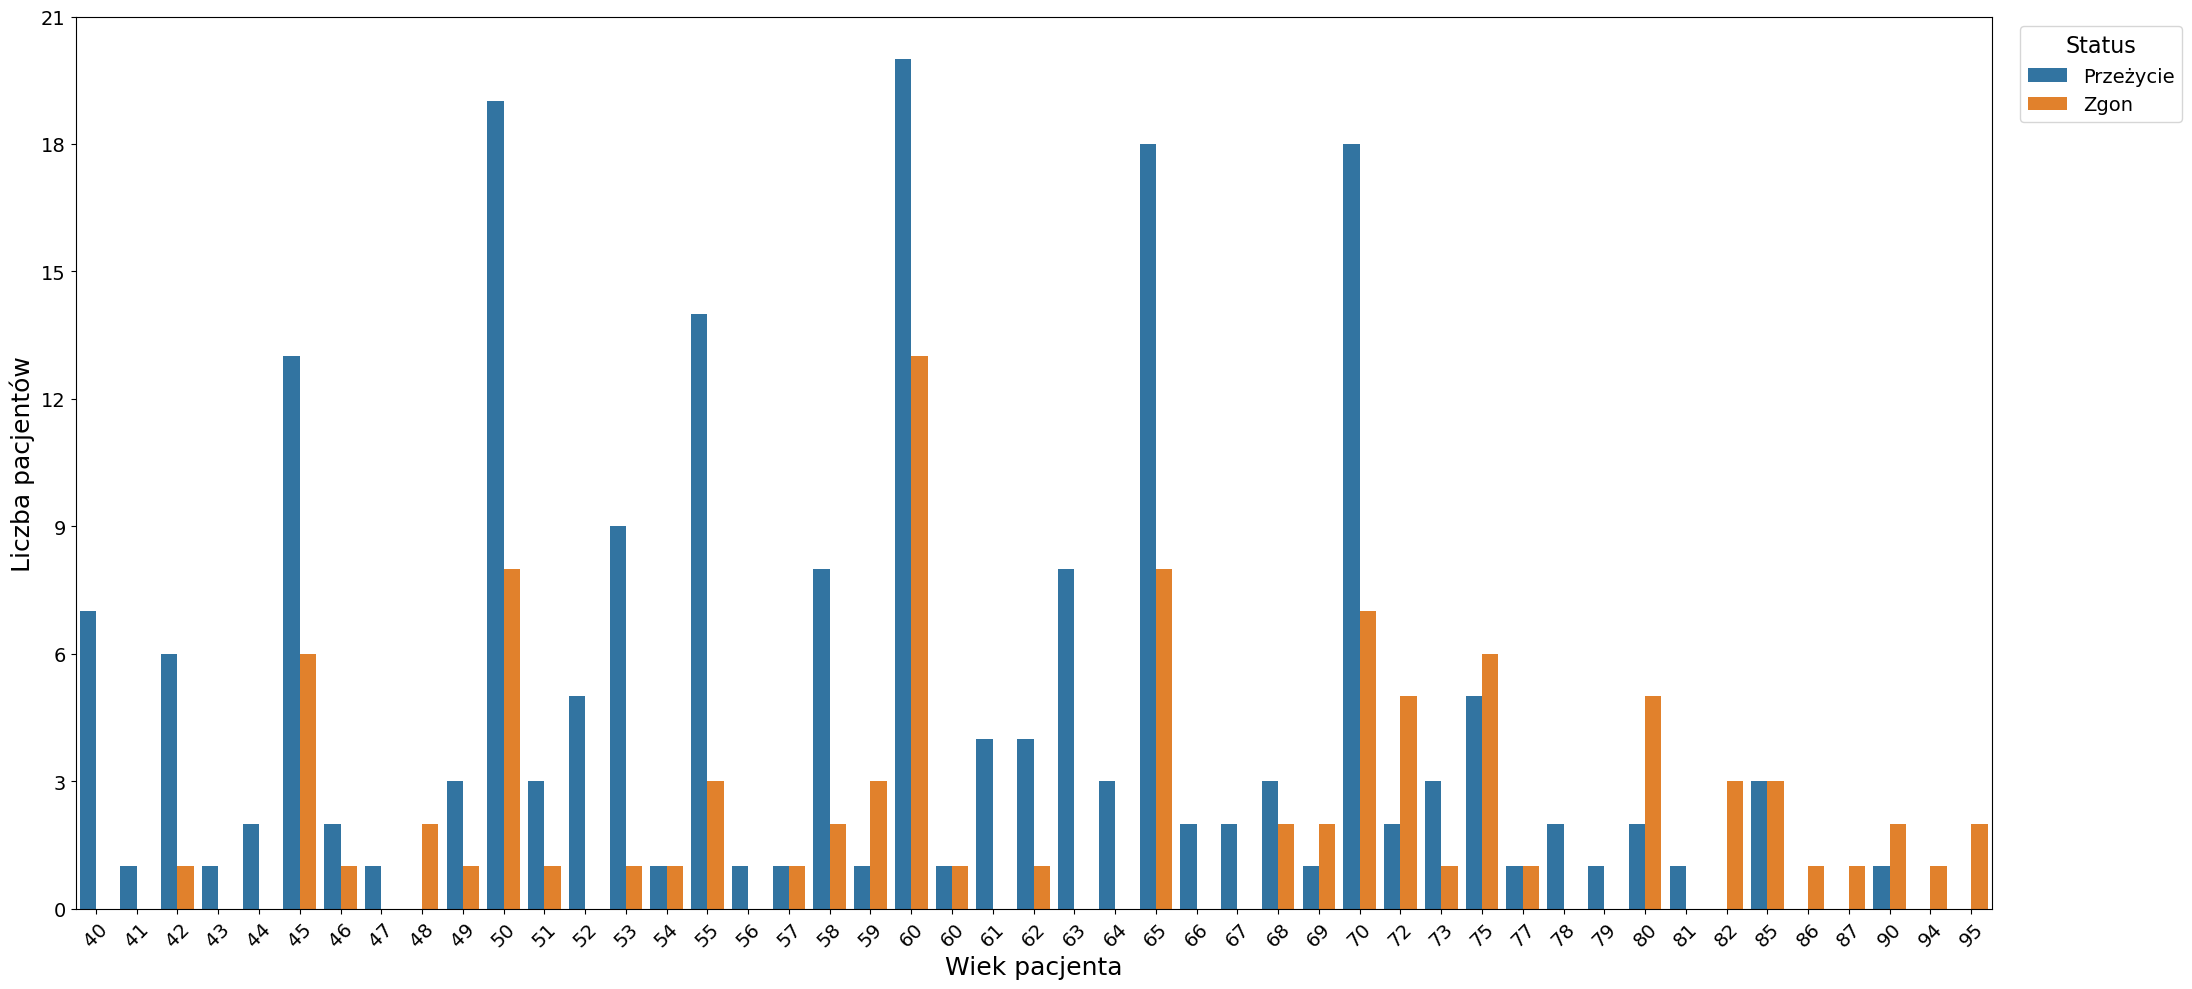

In [14]:
plt.figure(figsize=(22, 10))

# Wykres
dia = sns.countplot(x=heartData['age'], hue=heartData['DEATH_EVENT'], palette=['#1f77b4', '#ff7f0e'])


dia.yaxis.set_major_locator(MaxNLocator(integer=True))

# Oś X — bez .0
dia.set_xticklabels([int(float(label.get_text())) for label in dia.get_xticklabels()], rotation=45, fontsize=14)

# Oś Y
plt.yticks(fontsize=14)
plt.xlabel('Wiek pacjenta', fontsize=18)
plt.ylabel('Liczba pacjentów', fontsize=18)

# Legenda
legend_labels, _ = dia.get_legend_handles_labels()
dia.legend(legend_labels, ['Przeżycie', 'Zgon'],
           bbox_to_anchor=(1.01, 1), loc='upper left',
           title='Status', fontsize=14, title_fontsize=16)
# Wyświetlenie wieku minimalnego i maksymalnego
print("Minimalny wiek pacjenta:", min(age))
print("Maksymalny wiek pacjenta:", max(age))


plt.tight_layout()
plt.show()

## Analiza zmiennych kategorycznych 

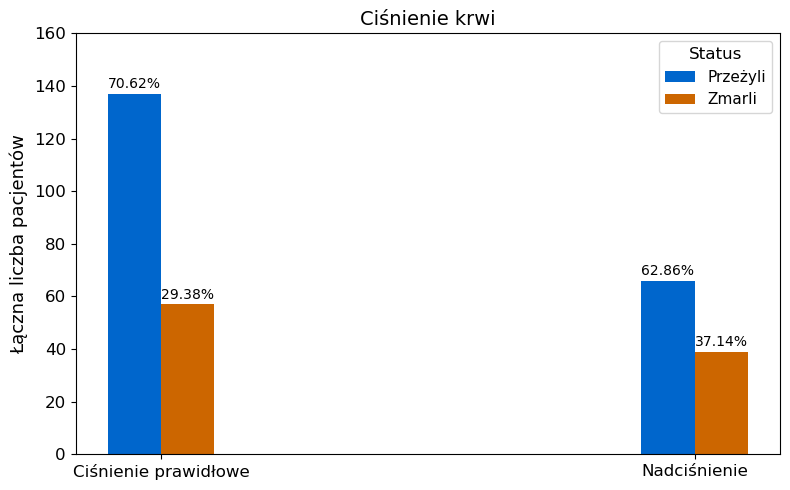

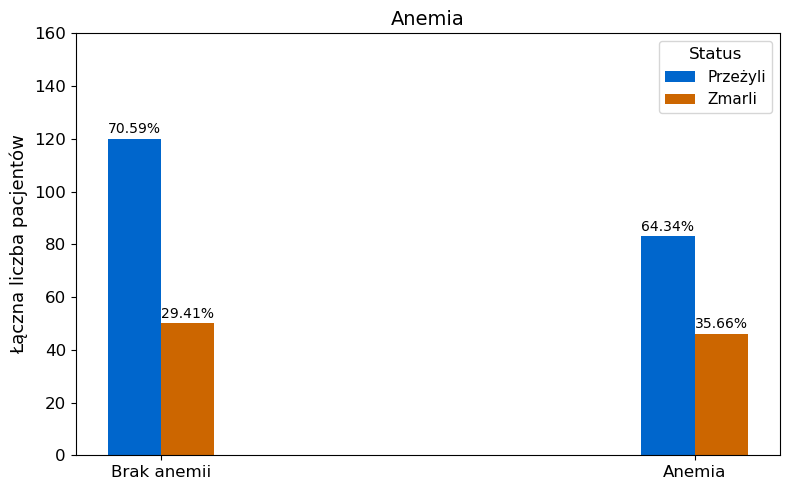

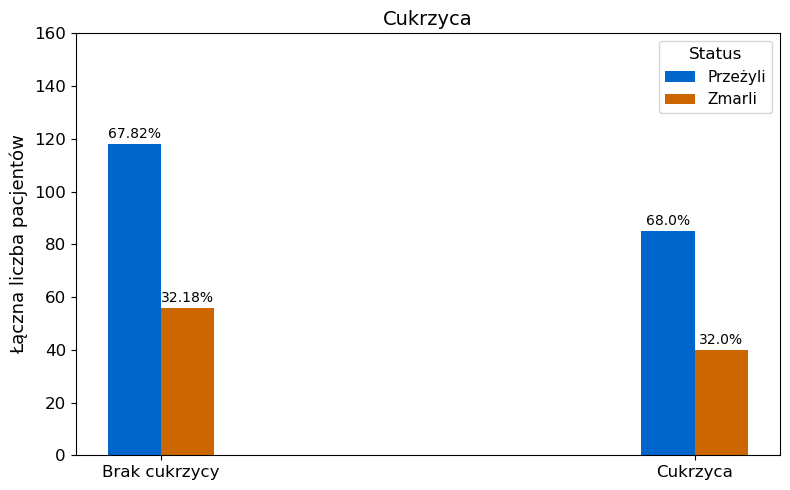

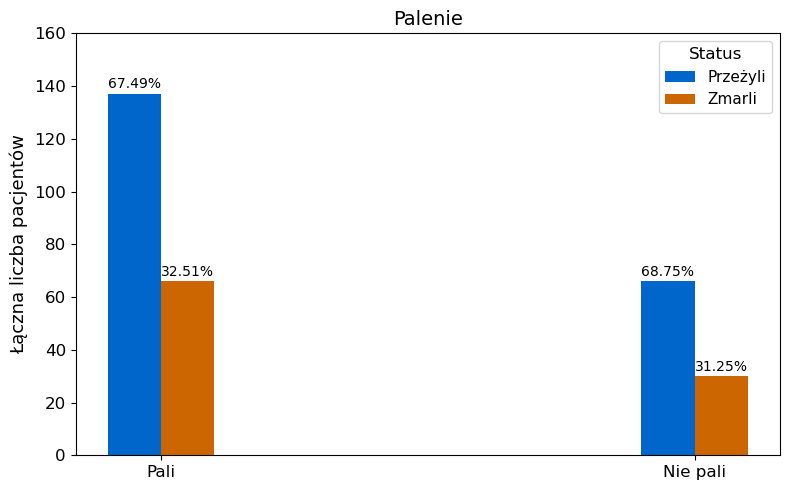

In [15]:
import matplotlib.pyplot as plt

cat = ['high_blood_pressure', 'anaemia', 'diabetes', 'smoking']
types = [['Ciśnienie prawidłowe', 'Nadciśnienie'],
         ['Brak anemii', 'Anemia'],
         ['Brak cukrzycy', 'Cukrzyca'],
         ['Pali', 'Nie pali']]

cat_titles = {
    'high_blood_pressure': 'Ciśnienie krwi',
    'anaemia': 'Anemia',
    'diabetes': 'Cukrzyca',
    'smoking': 'Palenie'
}

for i, c in enumerate(cat):
    alive = heartData[heartData['DEATH_EVENT'] == 0]
    died = heartData[heartData['DEATH_EVENT'] == 1]

    plt.figure(figsize=(8, 5))

    # Słupki dla przeżyli i zmarli
    bar1 = plt.bar([0, 1], alive.groupby(c).count()['age'], width=0.1,
                   color='#0066cc', align='center', label="Przeżyli")
    bar2 = plt.bar([0.1, 1.1], died.groupby(c).count()['age'], width=0.1,
                   color='#cc6600', align='center', label="Zmarli")


    plt.title(cat_titles[c], fontsize=14)
    plt.ylabel('Łączna liczba pacjentów', fontsize=13)
    plt.ylim(0, 160)
    plt.xticks([0.05, 1.05], types[i], fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Status', fontsize=11, title_fontsize=12)

    # Procenty
    hights_odd = []
    hights_even = []

    for j, rect in enumerate(bar1 + bar2):
        height = rect.get_height()
        if (j + 1) % 2 == 0:
            hights_even.append(height)
        else:
            hights_odd.append(height)

    for j, rect in enumerate(bar1 + bar2):
        height = rect.get_height()
        if (j + 1) % 2 == 0:
            pct = round((height / sum(hights_even)) * 100, 2)
        else:
            pct = round((height / sum(hights_odd)) * 100, 2)

        plt.text(rect.get_x() + rect.get_width() / 2.0, height + 1,
                 f'{pct}%', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

## Analiza cech numerycznych zbioru danych

C:\Users\dell\AppData\Local\Temp\ipykernel_21388\282773195.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_grouped.get_group(0)[title], bins=10, ax=ax, label='Przeżył')
C:\Users\dell\AppData\Local\Temp\ipykernel_21388\282773195.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_grou

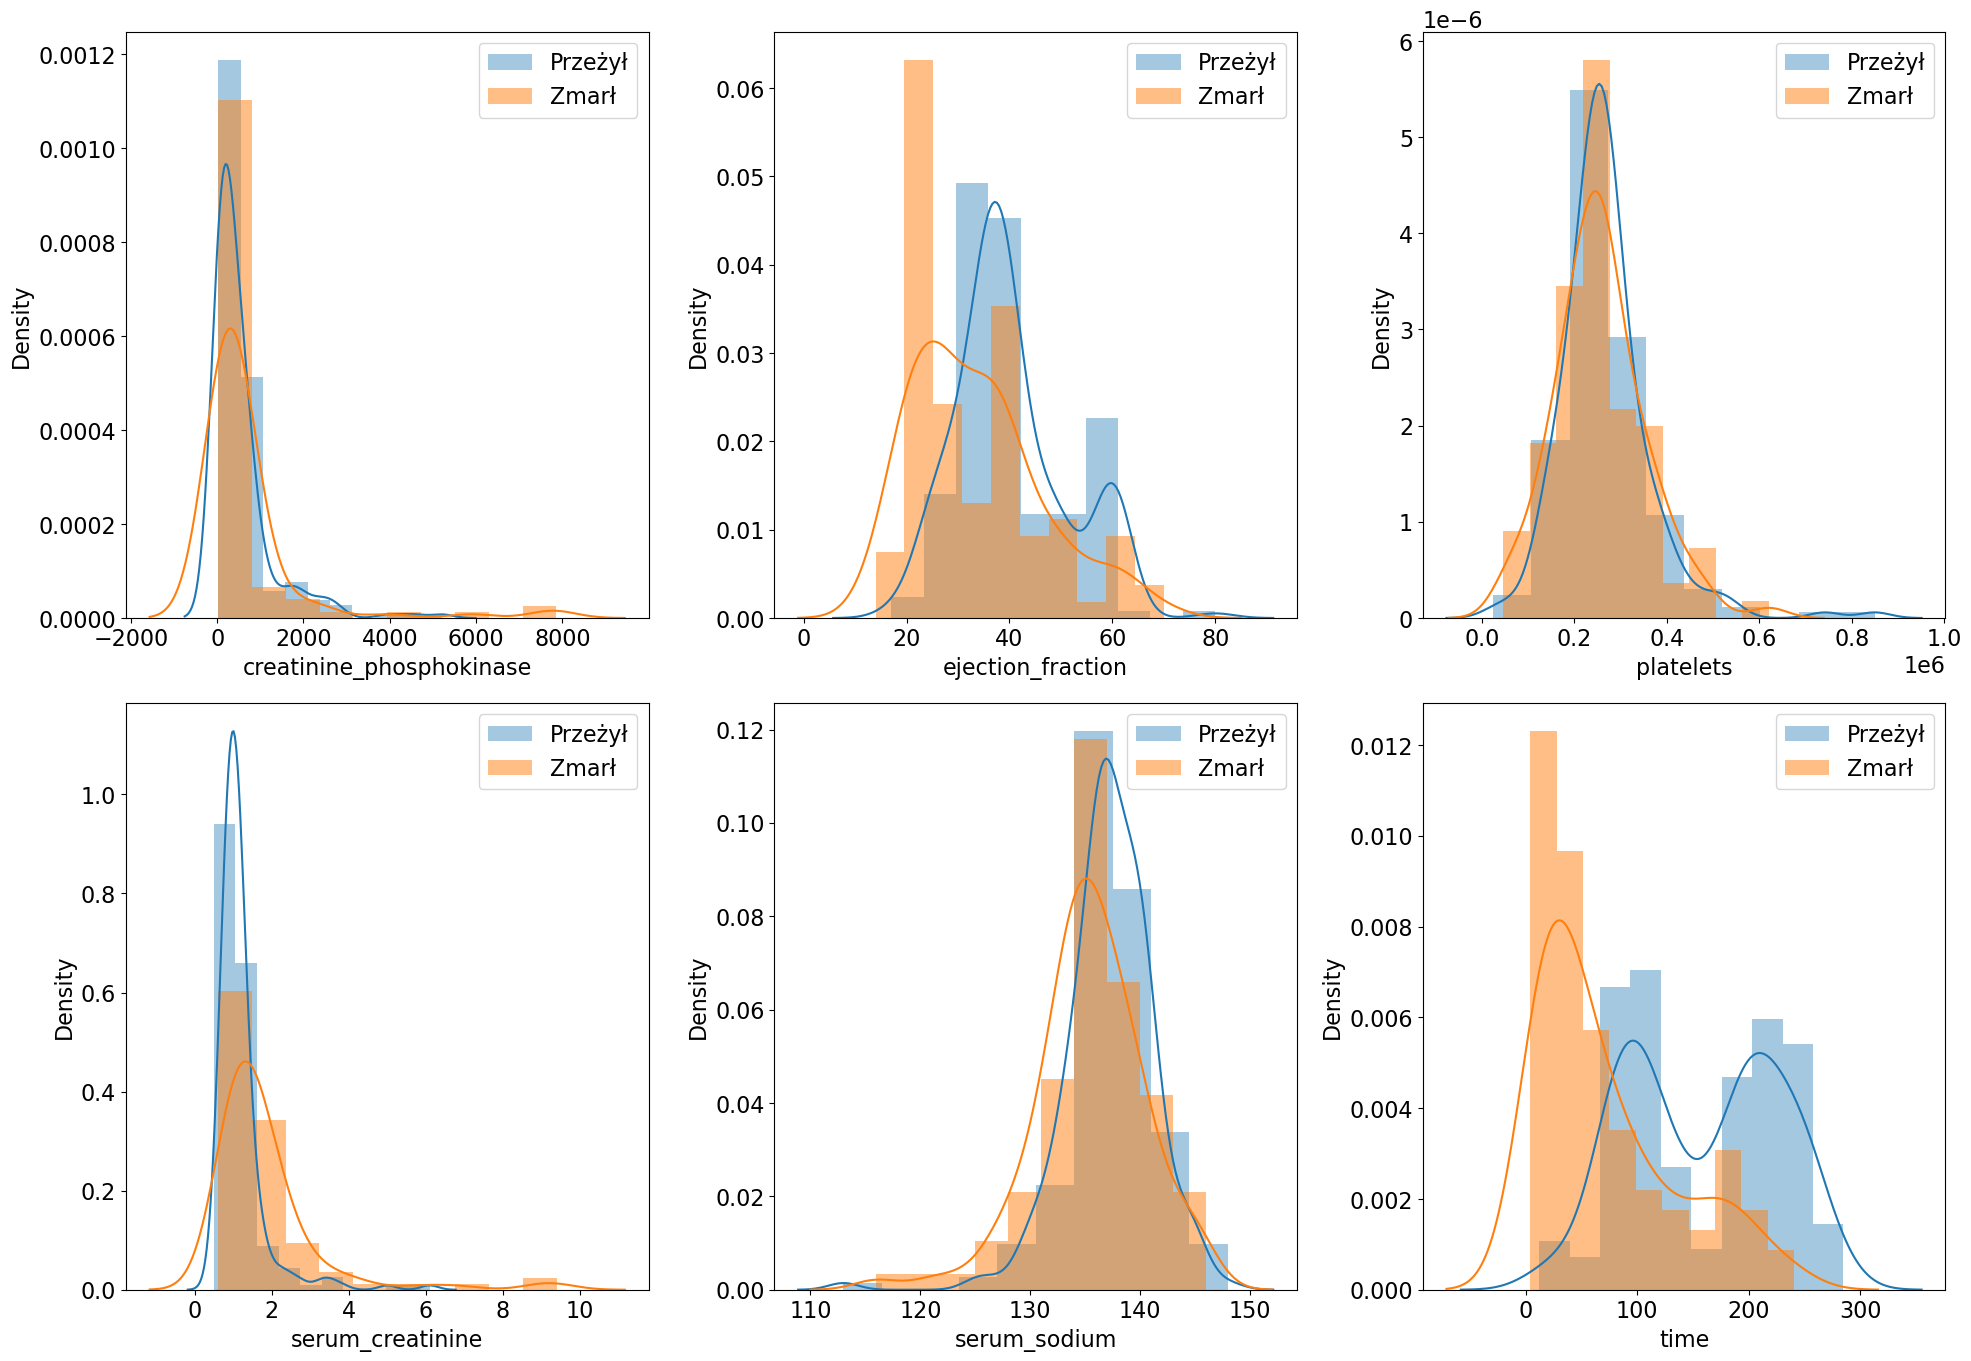

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
plt.rcParams.update({'font.size': 16})  

df_copy = heartData.copy()

# Zmiana typów kolumn na kategoryczne – żeby filtrować tylko kolumny numeryczne
for col in ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']:
    df_copy[col] = df_copy[col].astype('category')


df_grouped = df_copy.groupby(by='DEATH_EVENT')


fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))


titles = list(df_copy.select_dtypes(include='category'))

# Iteracja przez wykresy i kolumny
ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    # Rozkład dla pacjentów, którzy przeżyli
    sns.distplot(df_grouped.get_group(0)[title], bins=10, ax=ax, label='Przeżył')
    # Rozkład dla pacjentów, którzy zmarli
    sns.distplot(df_grouped.get_group(1)[title], bins=10, ax=ax, label='Zmarł', hist_kws=dict(alpha=0.5))
    ax.legend()

axs.flat[-1].remove()
axs.flat[-2].remove()
axs.flat[-3].remove()

# Dopasowanie układu
fig.tight_layout()


##  Wyszukiwanie korelacji w zbiorze danych

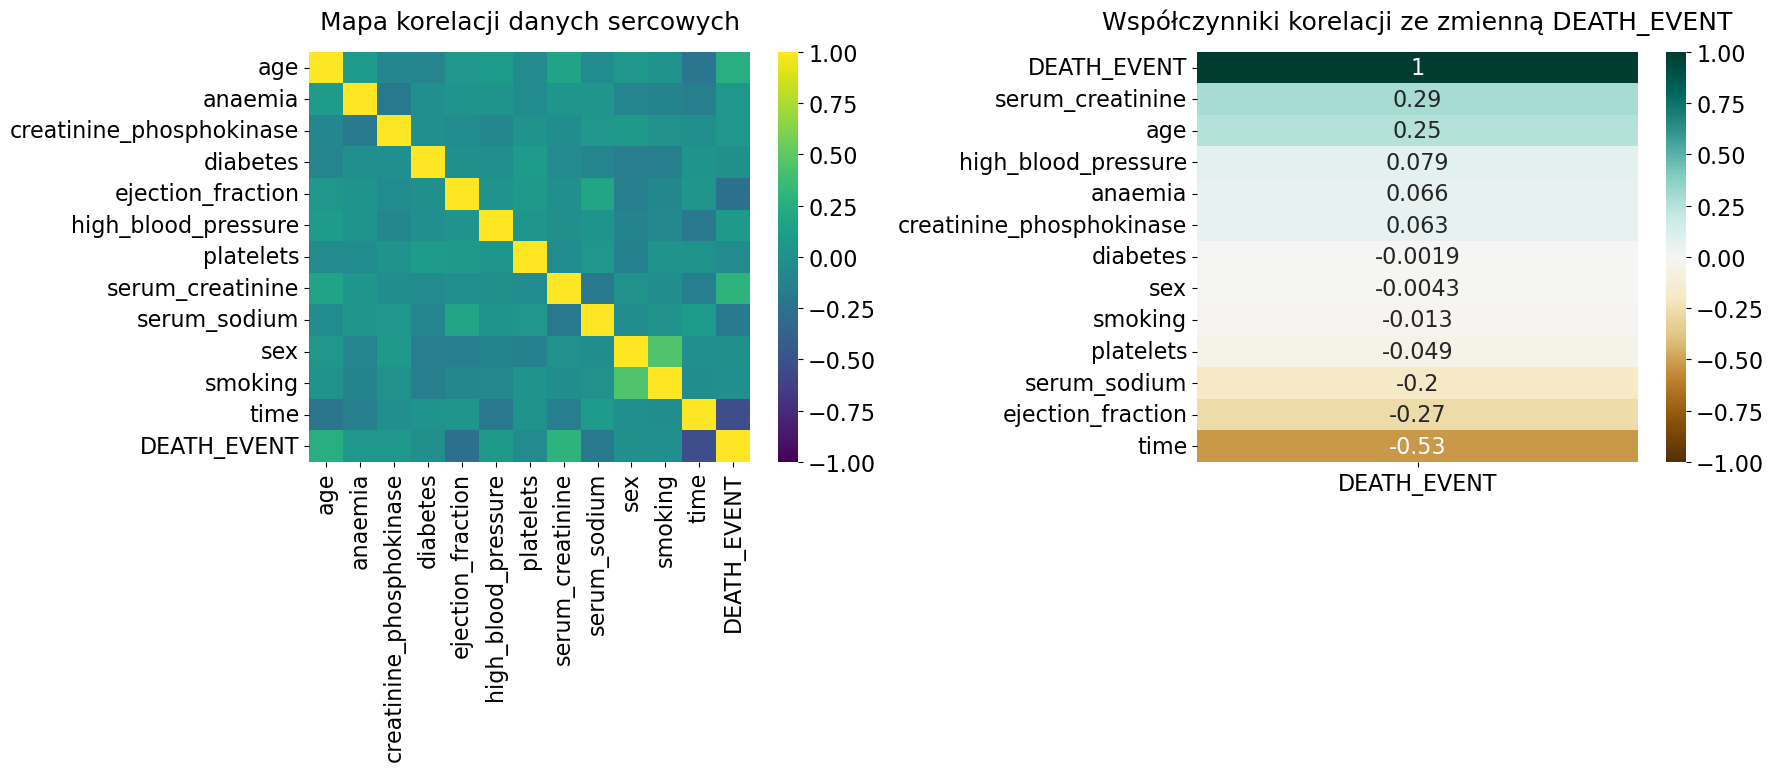

In [17]:
corr = heartData.corr()

fig, (axh1, axh2) = plt.subplots(1, 2, figsize=(18, 8))

# Pełna macierz korelacji
heatmap1 = sns.heatmap(corr, vmin=-1, cmap='viridis', annot=False, ax=axh1)
heatmap1.set_title('Mapa korelacji danych sercowych', fontdict={'fontsize':18}, pad=16)

# Korelacje względem zmiennej DEATH_EVENT
heatmap = sns.heatmap(heartData.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=axh2)
heatmap.set_title('Współczynniki korelacji ze zmienną DEATH_EVENT', fontdict={'fontsize':18}, pad=16)

plt.tight_layout()
plt.show()

Z analizy danych wynika, że:

-Osoby z niższym poziomem sodu we krwi, gorszą pracą serca i krótszym czasem leczenia częściej umierają.

-Natomiast starszy wiek i wysoki poziom kreatyniny (czyli problemy z nerkami) również zwiększają ryzyko śmierci.

## Klasyfikator drzew decyzyjnych 


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = heartData.drop('DEATH_EVENT', axis=1)
y = heartData['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)


In [19]:
dt_scores = []

for i in range(1, X_train_norm.shape[1] + 1):
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0)
    dt_classifier.fit(X_train_norm, y_train)
    dt_scores.append(dt_classifier.score(X_test_norm, y_test))


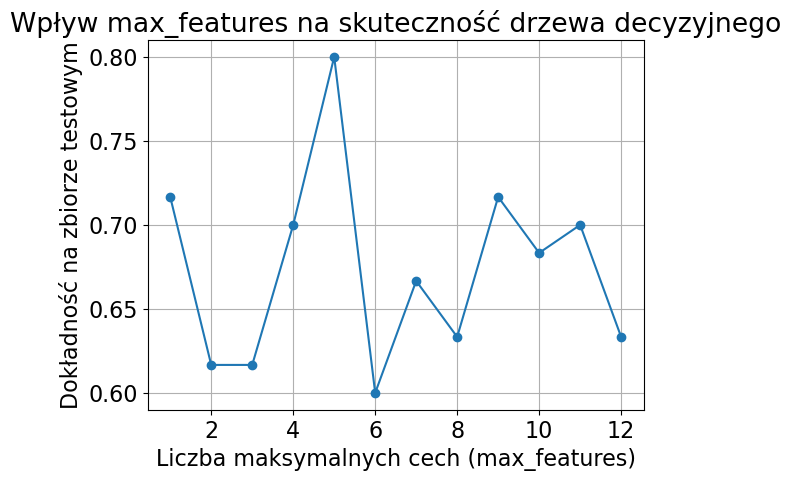

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1, X_train.shape[1] + 1), dt_scores, marker='o')
plt.xlabel('Liczba maksymalnych cech (max_features)')
plt.ylabel('Dokładność na zbiorze testowym')
plt.title('Wpływ max_features na skuteczność drzewa decyzyjnego')
plt.grid(True)
plt.show()


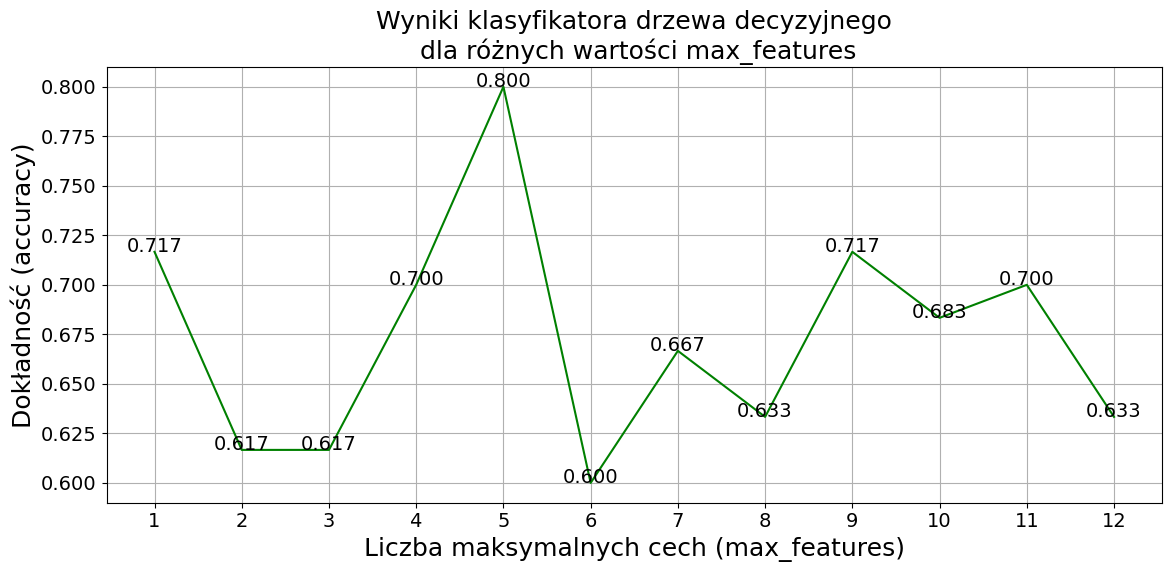

In [21]:
plt.figure(figsize=(12, 6))

# Zakładamy, że dt_scores już istnieje
plt.plot(range(1, X_train.shape[1] + 1), dt_scores, color='green')

for i in range(1, X_train.shape[1] + 1):
    plt.text(i, dt_scores[i-1], "{0:.3f}".format(dt_scores[i-1]), fontsize=14, ha='center')

# Etykiety osi
plt.xticks(range(1, X_train.shape[1] + 1), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Liczba maksymalnych cech (max_features)', fontdict={'fontsize': 18})
plt.ylabel('Dokładność (accuracy)', fontdict={'fontsize': 18})

# Tytuł
plt.title('Wyniki klasyfikatora drzewa decyzyjnego\n dla różnych wartości max_features', fontdict={'fontsize': 18})
plt.grid(True)
plt.tight_layout()
plt.show()

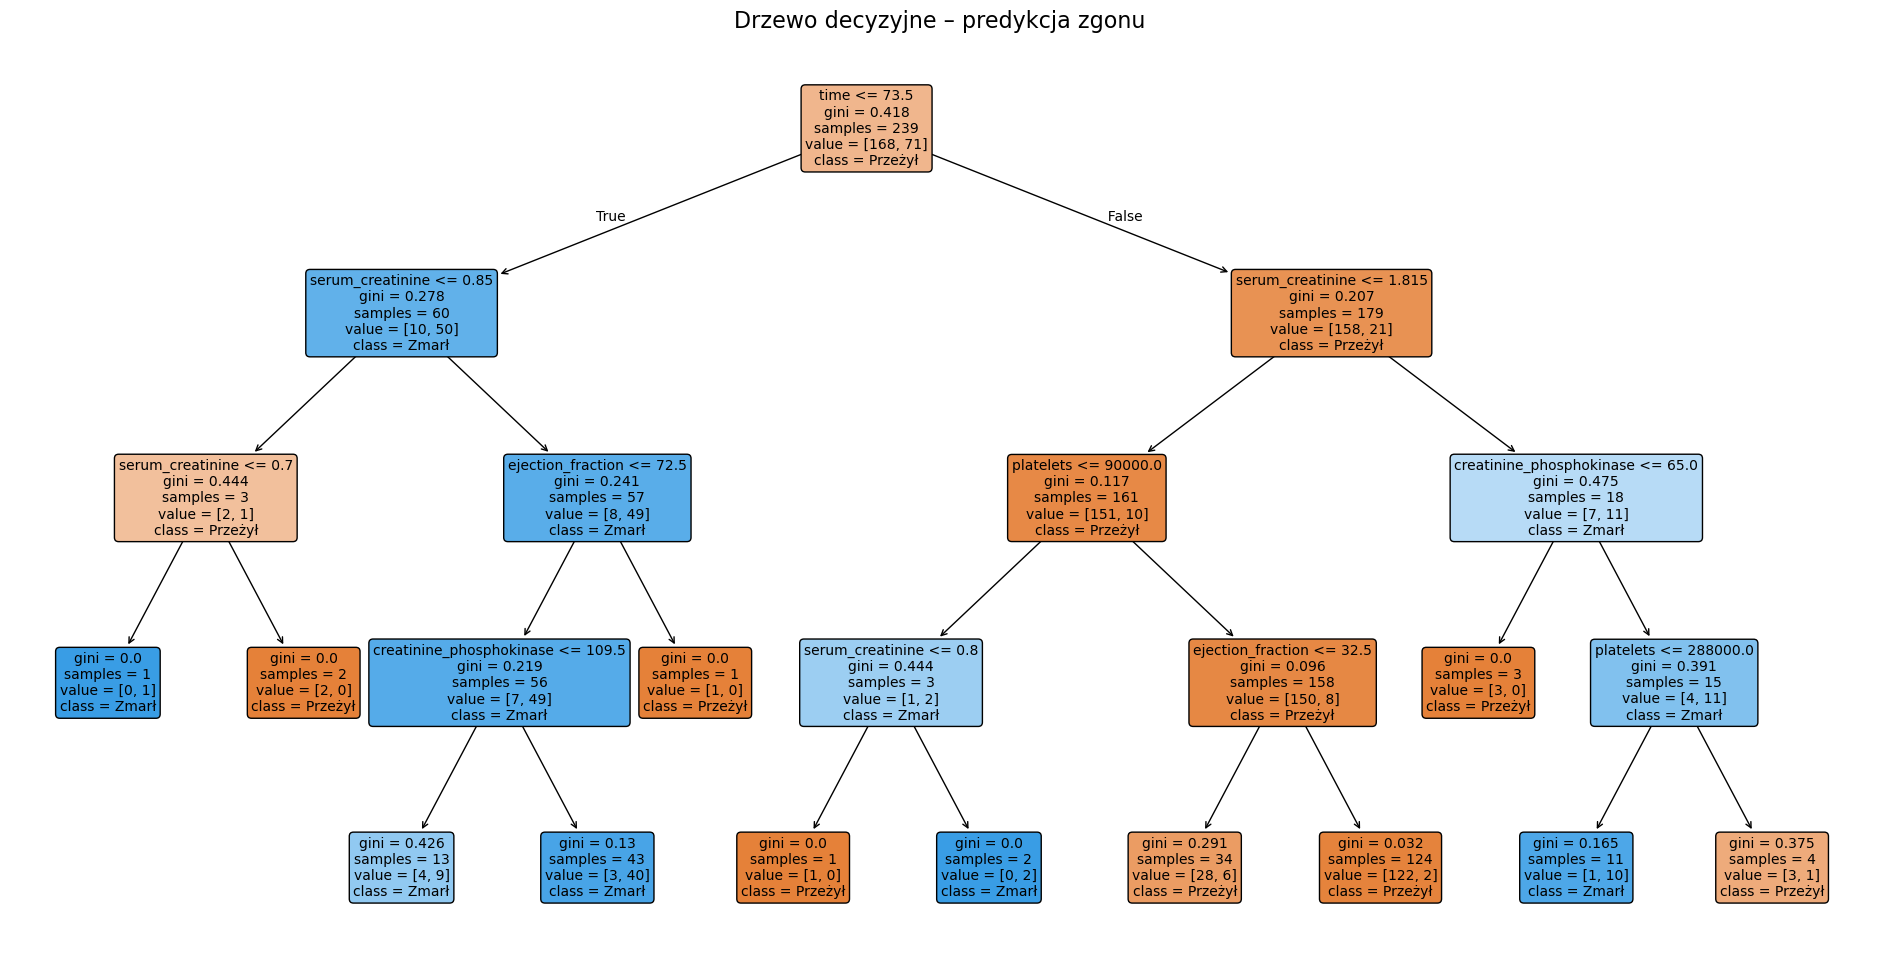

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Trenujemy drzewo decyzyjne
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Rysujemy drzewo
plt.figure(figsize=(24, 12))
plot_tree(
    clf,
    feature_names=X.columns,        
    class_names=["Przeżył", "Zmarł"], 
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Drzewo decyzyjne – predykcja zgonu", fontsize=16)
plt.show()

Decision Tree Training Data Accuracy = 91.21
Decision Tree Test Data Accuracy  = 68.33
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        35
           1       0.67      0.48      0.56        25

    accuracy                           0.68        60
   macro avg       0.68      0.65      0.66        60
weighted avg       0.68      0.68      0.67        60



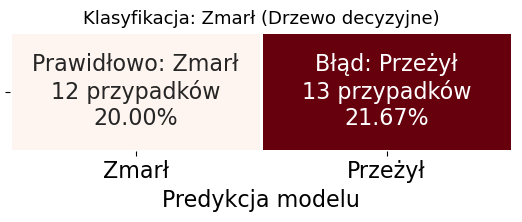

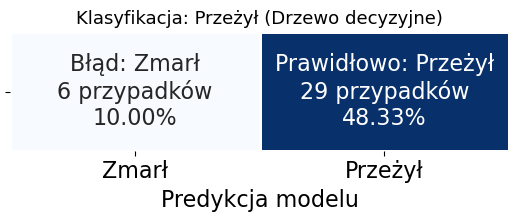

Średnia dokładność (5-krotna walidacja krzyżowa): 81.18%


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score


# Trenowanie modelu z ograniczeniem złożoności 
dtree2 = tree.DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=10,
    random_state=42
)
dt_parm = dtree2.fit(X_train_norm, y_train)
y_dtree = dtree2.predict(X_test_norm)

#  Ocena modelu
print("Decision Tree Training Data Accuracy = {:.2f}".format(100 * dt_parm.score(X_train_norm, y_train)))
print("Decision Tree Test Data Accuracy  = {:.2f}".format(100 * metrics.accuracy_score(y_test, y_dtree)))
print(classification_report(y_test, y_dtree))

#  Macierz pomyłek
cm = confusion_matrix(y_test, y_dtree)
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]
total = cm.sum()

# Wykres – klasa "Zmarł"
data_zmarl = np.array([[TP, FN]])
labels_zmarl = np.array([[
    f"Prawidłowo: Zmarł\n{TP} przypadków\n{TP/total:.2%}",
    f"Błąd: Przeżył\n{FN} przypadków\n{FN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_zmarl, annot=labels_zmarl, fmt='', cmap='Reds',
            xticklabels=["Zmarł", "Przeżył"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Zmarł (Drzewo decyzyjne)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("klasyfikacja_zmarł.png", dpi=300, bbox_inches='tight')
plt.show()

#  Wykres – klasa "Przeżył"
data_przezyli = np.array([[FP, TN]])
labels_przezyli = np.array([[
    f"Błąd: Zmarł\n{FP} przypadków\n{FP/total:.2%}",
    f"Prawidłowo: Przeżył\n{TN} przypadków\n{TN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_przezyli, annot=labels_przezyli, fmt='', cmap='Blues',
            xticklabels=["Zmarł", "Przeżył"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Przeżył (Drzewo decyzyjne)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("klasyfikacja_przeżył.png", dpi=300, bbox_inches='tight')
plt.show()
scores = cross_val_score(dtree2, X_train_norm, y_train, cv=5, scoring='accuracy')
print("Średnia dokładność (5-krotna walidacja krzyżowa): {:.2f}%".format(100 * scores.mean()))


Z analizy metryk wynika, że:

model lepiej klasyfikuje pacjentów, którzy przeżyli (klasa 0, recall 83%) niż tych, którzy zmarli (klasa 1, recall tylko 48%),

precyzja i f1-score dla klasy "zmarł" są znacznie niższe, co oznacza, że model ma trudność z poprawnym wykrywaniem tej klasy.

## Random Forest Classifier

In [24]:
RFC=RandomForestClassifier(max_features='sqrt', max_depth=1000, random_state=1, n_estimators=1000, min_samples_split=2)
RFC_clf = RFC.fit(X_train_norm, y_train)
y_RFC=RFC.predict(X_test_norm)

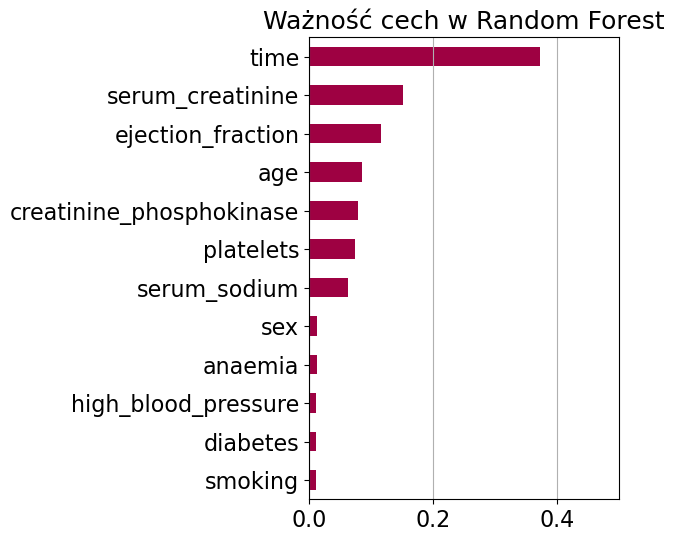

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize=(4,6))
feat_importances = pd.Series(RFC_clf.feature_importances_, heartData.drop('DEATH_EVENT', axis=1).columns)
feat_importances.nsmallest(12).plot(kind='barh', cmap=plt.cm.Spectral)

plt.xlim((0, 0.5))
plt.grid(axis='x')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Ważność cech w Random Forest', fontdict={'fontsize': 18})
plt.show()

plt.clf()


Random Forest – dokładność treningowa: 92.89%
Random Forest – dokładność testowa: 73.33%

Raport klasyfikacji:

              precision    recall  f1-score   support

     Przeżył       0.71      0.91      0.80        35
       Zmarł       0.80      0.48      0.60        25

    accuracy                           0.73        60
   macro avg       0.76      0.70      0.70        60
weighted avg       0.75      0.73      0.72        60



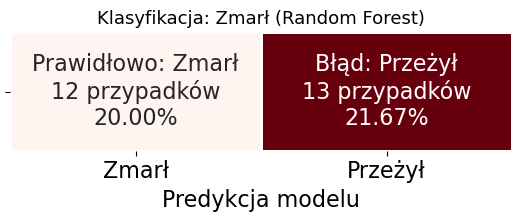

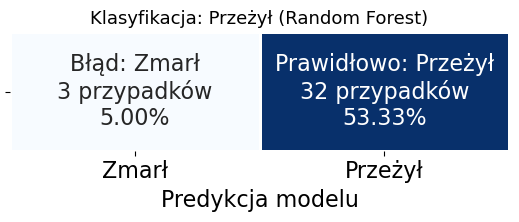

Średnia dokładność (5-krotna walidacja krzyżowa): 84.61%


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Skalowanie danych
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Połączenie danych do walidacji krzyżowej
X_norm = np.vstack((X_train_norm, X_test_norm))
y_norm = np.hstack((y_train, y_test))

# Random Forest – ograniczona złożoność
RFC_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Trening
RFC_clf.fit(X_train_norm, y_train)

# Predykcja
y_RFC = RFC_clf.predict(X_test_norm)

# Wyniki
print("Random Forest – dokładność treningowa: {:.2f}%".format(100 * RFC_clf.score(X_train_norm, y_train)))
print("Random Forest – dokładność testowa: {:.2f}%".format(100 * accuracy_score(y_test, y_RFC)))
print("\nRaport klasyfikacji:\n")
print(classification_report(y_test, y_RFC, target_names=["Przeżył", "Zmarł"], zero_division=0))

# Macierz pomyłek – wartości
cm = confusion_matrix(y_test, y_RFC)
TN, FP, FN, TP = cm.ravel()
total = cm.sum()

# Wykres – klasa: Zmarł
data_zmarl = np.array([[TP, FN]])
labels_zmarl = np.array([[
    f"Prawidłowo: Zmarł\n{TP} przypadków\n{TP/total:.2%}",
    f"Błąd: Przeżył\n{FN} przypadków\n{FN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_zmarl, annot=labels_zmarl, fmt='', cmap='Reds',
            xticklabels=["Zmarł", "Przeżył"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Zmarł (Random Forest)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("rf_zmarł.png", dpi=300, bbox_inches='tight')
plt.show()

# Wykres – klasa: Przeżył
data_przezyli = np.array([[FP, TN]])
labels_przezyli = np.array([[
    f"Błąd: Zmarł\n{FP} przypadków\n{FP/total:.2%}",
    f"Prawidłowo: Przeżył\n{TN} przypadków\n{TN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_przezyli, annot=labels_przezyli, fmt='', cmap='Blues',
            xticklabels=["Zmarł", "Przeżył"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Przeżył (Random Forest)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("rf_przeżył.png", dpi=300, bbox_inches='tight')
plt.show()

# Walidacja krzyżowa
cv_scores = cross_val_score(RFC_clf, X_norm, y_norm, cv=5)
print("Średnia dokładność (5-krotna walidacja krzyżowa): {:.2f}%".format(100 * cv_scores.mean()))


Model Random Forest osiągnął dokładność treningową na poziomie 92.89%, co wskazuje na wysoką skuteczność w dopasowaniu do danych uczących. Jednocześnie dokładność na zbiorze testowym wyniosła 73.33%, co sugeruje lepszą generalizację niż w przypadku drzewa decyzyjnego, choć nadal występują pewne oznaki przeuczenia.

Z raportu klasyfikacji wynika:

Klasa „Przeżył” została rozpoznana z wysoką czułością (recall = 91%) i przyzwoitą precyzją (71%), co skutkuje f1-score = 0.80.

Klasa „Zmarł” osiągnęła wyższą precyzję (80%), ale niższą czułość (48%), co oznacza, że model potrafi dobrze „potwierdzić” zgon, ale nie zawsze go wykrywa.

Średnia dokładność uzyskana w 5-krotnej walidacji krzyżowej 

### Support Vector Machine

SVM – dokładność treningowa: 84.52%
SVM – dokładność testowa: 80.00%

Raport klasyfikacji:

              precision    recall  f1-score   support

     Przeżył       0.79      0.89      0.84        35
       Zmarł       0.81      0.68      0.74        25

    accuracy                           0.80        60
   macro avg       0.80      0.78      0.79        60
weighted avg       0.80      0.80      0.80        60



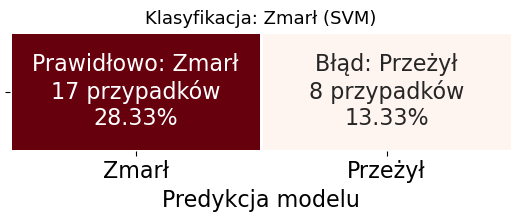

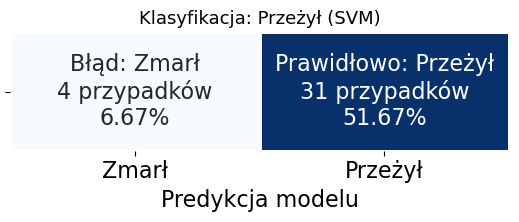

Średnia dokładność (5-krotna walidacja krzyżowa): 79.92%


In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Najlepsze jądro SVM (na podstawie wcześniejszych wyników – np. 'linear')
svm_best = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svm_best.fit(X_train_norm, y_train)

# Predykcja
y_svm = svm_best.predict(X_test_norm)

# Wyniki
print("SVM – dokładność treningowa: {:.2f}%".format(100 * svm_best.score(X_train_norm, y_train)))
print("SVM – dokładność testowa: {:.2f}%".format(100 * accuracy_score(y_test, y_svm)))
print("\nRaport klasyfikacji:\n")
print(classification_report(y_test, y_svm, target_names=["Przeżył", "Zmarł"], zero_division=0))

# Macierz pomyłek
cm = confusion_matrix(y_test, y_svm)
TN, FP, FN, TP = cm.ravel()
total = cm.sum()

# Wykres – Zmarł
data_zmarl = np.array([[TP, FN]])
labels_zmarl = np.array([[
    f"Prawidłowo: Zmarł\n{TP} przypadków\n{TP/total:.2%}",
    f"Błąd: Przeżył\n{FN} przypadków\n{FN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_zmarl, annot=labels_zmarl, fmt='', cmap='Reds',
            xticklabels=["Zmarł", "Przeżył"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Zmarł (SVM)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("svm_zmarł.png", dpi=300, bbox_inches='tight')
plt.show()

# Wykres – Przeżył
data_przezyli = np.array([[FP, TN]])
labels_przezyli = np.array([[
    f"Błąd: Zmarł\n{FP} przypadków\n{FP/total:.2%}",
    f"Prawidłowo: Przeżył\n{TN} przypadków\n{TN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_przezyli, annot=labels_przezyli, fmt='', cmap='Blues',
            xticklabels=["Zmarł", "Przeżył"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Przeżył (SVM)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("svm_przeżył.png", dpi=300, bbox_inches='tight')
plt.show()

# Krzyżowa walidacja
cv_scores = cross_val_score(svm_best, X_norm, y_norm, cv=5)
print("Średnia dokładność (5-krotna walidacja krzyżowa): {:.2f}%".format(100 * cv_scores.mean()))


Model SVM osiągnął dokładność treningową 84.52% i testową 80.00%, co oznacza, że dobrze generalizuje — nie jest przeuczony, a jednocześnie zachowuje wysoką skuteczność na nieznanych danych.

W porównaniu do innych modeli:

SVM osiąga najwyższą dokładność na zbiorze testowym spośród wszystkich testowanych modeli (Logistic Regression, Decision Tree, Random Forest),

utrzymuje bardzo dobrą równowagę między klasami — f1-score dla klasy „Przeżył” to 0.84, a dla „Zmarł” 0.74.

Z raportu klasyfikacji wynika, że:

klasa „Zmarł” została rozpoznana z dobrą precyzją (81%) oraz umiarkowaną czułością (68%),

klasa „Przeżył” uzyskała czułość na poziomie 89%, co oznacza, że model rzadko błędnie klasyfikuje pacjentów, którzy rzeczywiście przeżyli.

### Regresja logistyczna

Regresja logistyczna – dokładność treningowa: 83.26%
Regresja logistyczna – dokładność testowa: 80.00%

Raport klasyfikacji:

              precision    recall  f1-score   support

     Przeżył       0.78      0.91      0.84        35
       Zmarł       0.84      0.64      0.73        25

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.80      0.79        60



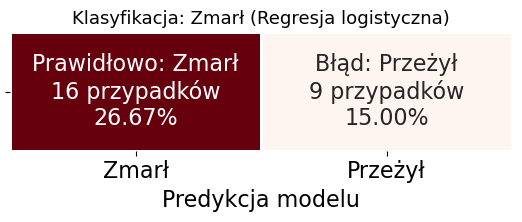

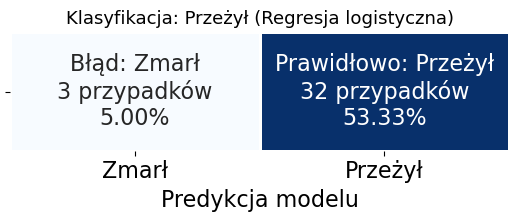

Średnia dokładność (5-krotna walidacja krzyżowa): 77.25%


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Skalowanie danych
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Połączenie danych do walidacji krzyżowej
X_norm = np.vstack((X_train_norm, X_test_norm))
y_norm = np.hstack((y_train, y_test))

# Model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train_norm, y_train)

# Predykcja
y_log = log_reg.predict(X_test_norm)

# Wyniki
print("Regresja logistyczna – dokładność treningowa: {:.2f}%".format(100 * log_reg.score(X_train_norm, y_train)))
print("Regresja logistyczna – dokładność testowa: {:.2f}%".format(100 * accuracy_score(y_test, y_log)))
print("\nRaport klasyfikacji:\n")
print(classification_report(y_test, y_log, target_names=["Przeżył", "Zmarł"], zero_division=0))

# Macierz pomyłek
cm = confusion_matrix(y_test, y_log)
TN, FP, FN, TP = cm.ravel()
total = cm.sum()

# Wykres – Zmarł
data_zmarl = np.array([[TP, FN]])
labels_zmarl = np.array([[
    f"Prawidłowo: Zmarł\n{TP} przypadków\n{TP/total:.2%}",
    f"Błąd: Przeżył\n{FN} przypadków\n{FN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_zmarl, annot=labels_zmarl, fmt='', cmap='Reds',
            xticklabels=["Zmarł", "Przeżył"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Zmarł (Regresja logistyczna)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("logreg_zmarł.png", dpi=300, bbox_inches='tight')
plt.show()

# Wykres – Przeżył
data_przezyli = np.array([[FP, TN]])
labels_przezyli = np.array([[
    f"Błąd: Zmarł\n{FP} przypadków\n{FP/total:.2%}",
    f"Prawidłowo: Przeżył\n{TN} przypadków\n{TN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_przezyli, annot=labels_przezyli, fmt='', cmap='Blues',
            xticklabels=["Zmarł", "Przeżył"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Przeżył (Regresja logistyczna)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("logreg_przeżył.png", dpi=300, bbox_inches='tight')
plt.show()

# Krzyżowa walidacja
cv_scores = cross_val_score(log_reg, X_norm, y_norm, cv=5)
print("Średnia dokładność (5-krotna walidacja krzyżowa): {:.2f}%".format(100 * cv_scores.mean()))


Regresja logistyczna osiągnęła dokładność treningową na poziomie 83.26% oraz testową 80.00%, co pokazuje, że model nie jest przeuczony i dobrze generalizuje do nowych danych.

Z raportu klasyfikacji wynika, że:

Klasa „Przeżył” została rozpoznana z wysoką czułością (91%) i dobrą precyzją (78%), co przełożyło się na f1-score = 0.84.

Klasa „Zmarł” została rozpoznana z wysoką precyzją (84%), ale umiarkowaną czułością (64%) — model więc częściej pomija przypadki zgonu niż je fałszywie wskazuje, co jest typowym kompromisem w tego typu klasyfikatorach.

### Wnioski

 Ranking modeli – wykrycie klasy 'Zmarł' (najwyższy recall):
                 Model  Recall (Zmarł)
2                  SVM            0.68
3  Logistic Regression            0.64
0        Decision Tree            0.48
1        Random Forest            0.48

 Ranking modeli – wykrycie klasy 'Przeżył' (najwyższy recall):
                 Model  Recall (Przeżył)
1        Random Forest              0.91
3  Logistic Regression              0.91
2                  SVM              0.89
0        Decision Tree              0.83


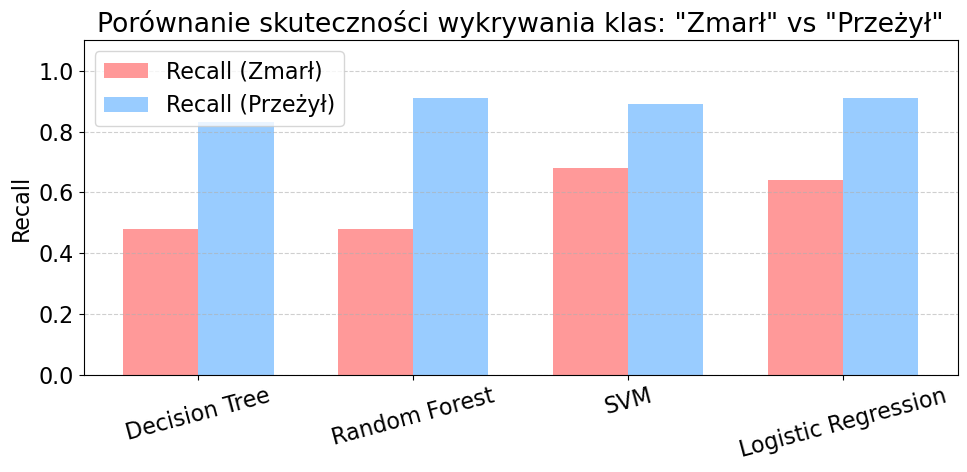

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Dane: recall dla każdej klasy
recall_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression'],
    'Recall (Zmarł)': [0.48, 0.48, 0.68, 0.64],
    'Recall (Przeżył)': [0.83, 0.91, 0.89, 0.91]
})

# Ranking według klasy "Zmarł"
ranking_zmarl = recall_df.sort_values(by='Recall (Zmarł)', ascending=False)

# Ranking według klasy "Przeżył"
ranking_przezyli = recall_df.sort_values(by='Recall (Przeżył)', ascending=False)

print(" Ranking modeli – wykrycie klasy 'Zmarł' (najwyższy recall):")
print(ranking_zmarl[['Model', 'Recall (Zmarł)']])
print("\n Ranking modeli – wykrycie klasy 'Przeżył' (najwyższy recall):")
print(ranking_przezyli[['Model', 'Recall (Przeżył)']])

# Wykres porównawczy
plt.figure(figsize=(10, 5))
bar_width = 0.35
x = range(len(recall_df))

plt.bar(x, recall_df['Recall (Zmarł)'], width=bar_width, label='Recall (Zmarł)', color='#FF9999')
plt.bar([p + bar_width for p in x], recall_df['Recall (Przeżył)'], width=bar_width, label='Recall (Przeżył)', color='#99CCFF')

plt.xticks([p + bar_width / 2 for p in x], recall_df['Model'], rotation=15)
plt.ylabel('Recall')
plt.title('Porównanie skuteczności wykrywania klas: "Zmarł" vs "Przeżył"')
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
